# Part I - Analysis of Go Fordbike sharing system
## by Adebakin Ayub T.

## Introduction

> This analysis tends to analyze the GO Fordbike sharing system. The dataset consist of one hundred and eighty three thousnad four hundred and twelce(183412) rows(samples) measured over sixteen(16) features/variables/ columns. The Go Ford bike is a bike hiring services that matches a member with an electronic assisted bicycle to navigate the busy, in most cases heavy traffic roads so that computing time can be reduced and efficiency can be increased as the case may be. The bike has been noticed to climb hilly roads that could have been stressful on regular byclces.
* duration_sec : the diference between the time a person hires bike and returns it at the dock which is the end time.
* start_time : the start time the bicycle is hired
* end_time : the end time the byclec is returned to the dock
* start_station_id : the station id the bike is hired from
* start_station_name : the station name the bike to hired from
* start_station_latitude : the lattitude the bike is hired from
* start_station_longitude : the longitude the bike is hired from
* end_station_id : the station id the bike returned to
* end_station_name : the station name the bike to returned to
* end_station_latitude : the station latitude the bike is returned to
* end_station_longitude : the station longitude the bike is returned to
* bike_id : the bike id
* user_type : the user type (casual or member)
* member_birth_year : birth year of the user
* member_gender  : gender of the user
* bike_share_for_all_trip : if bike share was used for all trip user made within the city



## Preliminary Wrangling


In [491]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [492]:
ford = pd.read_csv('201902-fordgobike-tripdata.csv')

In [493]:
ford.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [494]:
ford.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [495]:
ford[ford.duplicated()]

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip


In [496]:
ford.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [497]:
ford.sample(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
112120,666,2019-02-12 16:04:36.0960,2019-02-12 16:15:42.8390,166.0,College Ave at Alcatraz Ave,37.851376,-122.252523,269.0,Telegraph Ave at Carleton St,37.862320,-122.258801,4895,Subscriber,1994.0,Male,No
151540,290,2019-02-06 17:14:39.1160,2019-02-06 17:19:29.6870,104.0,4th St at 16th St,37.767045,-122.390833,81.0,Berry St at 4th St,37.775880,-122.393170,1602,Subscriber,1995.0,Female,No
34448,3757,2019-02-23 23:26:09.2550,2019-02-24 00:28:46.8270,10.0,Washington St at Kearny St,37.795393,-122.404770,6.0,The Embarcadero at Sansome St,37.804770,-122.403234,4759,Subscriber,2000.0,Male,No
13702,828,2019-02-27 14:57:38.6930,2019-02-27 15:11:27.0200,5.0,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,5.0,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,6331,Subscriber,1993.0,Female,Yes
43575,644,2019-02-22 16:20:13.3680,2019-02-22 16:30:57.7740,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,67.0,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,6560,Customer,1968.0,Male,No


In [498]:
ford.shape

(183412, 16)

In [499]:
ford[ford.duplicated()]

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip


### Quaily Issue

#### 1. missing values in
  - start_station_id
  - start_station_name
  - end_station_id
  - end_station_name
  - member_birth_year
  - member_gender

#### 2. decimals in 
  - birth year
  - start station id
  - end station id

### Structural Issue

1. start time and end time needs be converted to date time
2. station id and bike id should be object data type

## cleaning 

In [500]:
# copying ford gobike data to df dataframe
df = ford.copy()

In [501]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


### Define: removing decimal and zero from end_station_id  and converting to object

#### code

In [502]:
# this function converts to object dtype and removes the last two characters using slicing
def con_extract(df,col):
    df[col] = df[col].astype(str)
    return df[col].str[:-2]

In [503]:
# checking end_station_id
df['end_station_id'].head()

0     13.0
1     81.0
2      3.0
3     70.0
4    222.0
Name: end_station_id, dtype: float64

In [504]:
# checking the number of rows in end_station_id
df['end_station_id'].shape

(183412,)

In [505]:
#applying con_extract function on end_station_id
df['end_station_id'] = con_extract(df,'end_station_id')

#### Testing

In [506]:
df['end_station_id'].head()

0     13
1     81
2      3
3     70
4    222
Name: end_station_id, dtype: object

In [507]:
# checking dtype of end_station_id
df['end_station_id'].dtype

dtype('O')

In [508]:
# checking end_station_id numberof rows after conversion
df['end_station_id'].shape

(183412,)

In [509]:
# checking the number of unique values in end stations
df['end_station_id'].unique().shape

(330,)

### Define: removing decimal and zero from start_station_id  and converting to object

#### code

In [510]:
df['start_station_id'].head()

0     21.0
1     23.0
2     86.0
3    375.0
4      7.0
Name: start_station_id, dtype: float64

In [511]:
# checking start_station_id stype
df['start_station_id'].dtype

dtype('float64')

In [512]:
# applying con_extract function start_station_id
df['start_station_id'] = con_extract(df,'start_station_id')

In [513]:
df['start_station_id'].shape

(183412,)

#### Testing

In [514]:
df['start_station_id'].head()

0     21
1     23
2     86
3    375
4      7
Name: start_station_id, dtype: object

In [515]:
df['start_station_id'].dtype

dtype('O')

In [516]:
df['start_station_id'].shape

(183412,)

In [517]:
# checking number of start stations
df['start_station_id'].unique().shape

(330,)

### Define: removing decimal and zero from member_birth_year  and converting to object

#### code

In [518]:
df['member_birth_year'].head()

0    1984.0
1       NaN
2    1972.0
3    1989.0
4    1974.0
Name: member_birth_year, dtype: float64

In [519]:
# applying con_extract on member_birth_year
df['member_birth_year'] = con_extract(df,'member_birth_year')

#### Testing

In [520]:
df['member_birth_year'].head()

0    1984
1       n
2    1972
3    1989
4    1974
Name: member_birth_year, dtype: object

### Define: dropping null values( 'n')

In [521]:
# getting the index of nulls changed to n while converting and extracting
index = df[df['member_birth_year'] == 'n'].index
index

Int64Index([     1,     13,     28,     53,     65,    147,    176,    220,
               266,    292,
            ...
            183281, 183286, 183306, 183310, 183332, 183354, 183356, 183363,
            183371, 183402],
           dtype='int64', length=8265)

#### code

In [522]:
# this function drops rows or columns 
def drop(df, row_col, axis):
    return df.drop(row_col, axis=axis, inplace = True)

In [523]:
# dropping index elements which also are missing values
drop(df,index,0)

#### Testing

In [524]:
# checking member birth year after dropping n values in its column
df['member_birth_year'].head()

0    1984
2    1972
3    1989
4    1974
5    1959
Name: member_birth_year, dtype: object

In [525]:
df.isnull().sum()

duration_sec                 0
start_time                   0
end_time                     0
start_station_id             0
start_station_name         195
start_station_latitude       0
start_station_longitude      0
end_station_id               0
end_station_name           195
end_station_latitude         0
end_station_longitude        0
bike_id                      0
user_type                    0
member_birth_year            0
member_gender                0
bike_share_for_all_trip      0
dtype: int64

### Define : dropping null values in start_station_id and end_station_id

#### code

In [526]:
# checking the number of missing values
df['start_station_name'].isnull().sum()

195

In [527]:
# checking if the index of missing values in start_station_id is same as end station_id 
(df[df['start_station_name'].isnull()].index == df[df['end_station_name'].isnull()].index).sum()

195

In [528]:
# getting the index of missing values in start_station_id
start_station_name_index = df[df['start_station_name'].isnull()].index
start_station_name_index

Int64Index([   475,   1733,   3625,   4070,   5654,   6214,   8499,   8783,
             10967,  11071,
            ...
            155470, 161400, 161844, 172481, 174807, 176154, 179730, 179970,
            180106, 181201],
           dtype='int64', length=195)

In [529]:
# dropiing missing values in start_station_id rowise
drop(df,start_station_name_index, axis=0)

#### Testing

In [530]:
# testing if there's any missing value after dropping
df['start_station_name'].isnull().sum()

0

In [531]:
df.isnull().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

In [532]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             174952 non-null  int64  
 1   start_time               174952 non-null  object 
 2   end_time                 174952 non-null  object 
 3   start_station_id         174952 non-null  object 
 4   start_station_name       174952 non-null  object 
 5   start_station_latitude   174952 non-null  float64
 6   start_station_longitude  174952 non-null  float64
 7   end_station_id           174952 non-null  object 
 8   end_station_name         174952 non-null  object 
 9   end_station_latitude     174952 non-null  float64
 10  end_station_longitude    174952 non-null  float64
 11  bike_id                  174952 non-null  int64  
 12  user_type                174952 non-null  object 
 13  member_birth_year        174952 non-null  object 
 14  memb

### Define: changing member_birth_year to numeric

#### code

In [533]:
# converting member_birth_year to numberic
df['member_birth_year'] =pd.to_numeric(df['member_birth_year'])

#### testing

In [534]:
df['member_birth_year'].dtype

dtype('int64')

### Define: changing start_time and end_time to numeric

#### code

In [535]:
# changing start_time to datetime dtype
df['start_time'] = pd.to_datetime(df['start_time'])

In [536]:
# changing end_time to datetime dtype
df['end_time'] = pd.to_datetime(df['end_time'])

#### Testing

In [537]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  object        
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   174952 non-null  float64       
 6   start_station_longitude  174952 non-null  float64       
 7   end_station_id           174952 non-null  object        
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     174952 non-null  float64       
 10  end_station_longitude    174952 non-null  float64       
 11  bike_id                  174952 non-null  int64         
 12  user_type       

### Define: changing bike_id from float to obj

#### code

In [538]:
# changing bike_id to object 
df['bike_id'] = df['bike_id'].astype('str')

In [539]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  object        
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   174952 non-null  float64       
 6   start_station_longitude  174952 non-null  float64       
 7   end_station_id           174952 non-null  object        
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     174952 non-null  float64       
 10  end_station_longitude    174952 non-null  float64       
 11  bike_id                  174952 non-null  object        
 12  user_type       

In [540]:
# checking if decimals in bike_id
for v in df['bike_id']:
    if '.' in v:
        print(v)

### changing user_type to ordinal dtype

#### code

In [541]:
df['user_type'] = df['user_type'].astype('category')

#### test

In [542]:
df['user_type'].dtype

CategoricalDtype(categories=['Customer', 'Subscriber'], ordered=False)

In [543]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  object        
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   174952 non-null  float64       
 6   start_station_longitude  174952 non-null  float64       
 7   end_station_id           174952 non-null  object        
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     174952 non-null  float64       
 10  end_station_longitude    174952 non-null  float64       
 11  bike_id                  174952 non-null  object        
 12  user_type       

In [544]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984,Male,No
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86,Market St at Dolores St,37.769305,-122.426826,3,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972,Male,No
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375,Grove St at Masonic Ave,37.774836,-122.446546,70,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989,Other,No
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7,Frank H Ogawa Plaza,37.804562,-122.271738,222,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974,Male,Yes
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93,4th St at Mission Bay Blvd S,37.770407,-122.391198,323,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959,Male,No


In [545]:
# cheacking the years in the data
df['start_time'].dt.year.nunique()

1

In [546]:
# checking the year in the dataframe
df['start_time'].dt.year.unique()

array([2019], dtype=int64)

In [547]:
# checking the number of months in the dataframe
df['start_time'].dt.month.nunique()

1

In [548]:
# checking the month
df['start_time'].dt.month.unique()

array([2], dtype=int64)

In [549]:
# creacting age variable
df['age'] = df['start_time'].dt.year - df['member_birth_year']

In [550]:
df['age'].head()

0    35
2    47
3    30
4    45
5    60
Name: age, dtype: int64

In [551]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,age
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984,Male,No,35
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86,Market St at Dolores St,37.769305,-122.426826,3,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972,Male,No,47
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375,Grove St at Masonic Ave,37.774836,-122.446546,70,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989,Other,No,30
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7,Frank H Ogawa Plaza,37.804562,-122.271738,222,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974,Male,Yes,45
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93,4th St at Mission Bay Blvd S,37.770407,-122.391198,323,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959,Male,No,60


In [552]:
# this function compute distance with the provided longitude and latitude using haversine formular 
def get_distance(df,lon1, lat1, lon2, lat2):

    df[lon1], df[lat1], df[lon2], df[lat2] = map(np.radians, [df[lon1], df[lat1], df[lon2], df[lat2]])

    newlon = df[lon2] - df[lon1]
    newlat = df[lat2] - df[lat1]

    haver_formula = np.sin(newlat/2.0)**2 + np.cos(df[lat1]) * np.cos(df[lat2]) * np.sin(newlon/2.0)**2

    dist = 2 * np.arcsin(np.sqrt(haver_formula ))
    km = 6367 * dist #6367 for distance in KM for miles use 3958
    return km * 1000 # multiply by 1000 to convert to meters

In [553]:
# creating a copy of df so the radian transformation in the get_distance function won't affect the dataframe am working on 
df1 = df.copy()

In [554]:
# computing the respective distances using get_distance
df1['distance'] = get_distance(df1, 'start_station_longitude', 'start_station_latitude', 'end_station_longitude', 'end_station_latitude')

In [555]:
# saving the computed distances in df1 to df
df['distance'] = df1['distance']

In [556]:
# checking the first few rows in df['distance']
df['distance'].head()

0     544.366511
2    2702.847096
3     260.574841
4    2407.788748
5    3330.110521
Name: distance, dtype: float64

In [557]:
# converting duration_secduration_sec_sec minute
df['duration_sec'] = df['duration_sec']/60

In [558]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,age,distance
0,869.750000,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984,Male,No,35,544.366511
2,1030.900000,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86,Market St at Dolores St,37.769305,-122.426826,3,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972,Male,No,47,2702.847096
3,608.166667,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375,Grove St at Masonic Ave,37.774836,-122.446546,70,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989,Other,No,30,260.574841
4,26.416667,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7,Frank H Ogawa Plaza,37.804562,-122.271738,222,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974,Male,Yes,45,2407.788748
5,29.883333,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93,4th St at Mission Bay Blvd S,37.770407,-122.391198,323,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959,Male,No,60,3330.110521


In [559]:
# (df['end_time'] - df['start_time'])

In [605]:
df['age'].loc[index]

5         60
43        60
67        60
203       58
307       58
          ..
183296    60
183304    61
183305    69
183385    74
183388    92
Name: age, Length: 5781, dtype: int64

In [606]:
df[df['age']==92]

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,age,distance,log_age
183388,8.166667,2019-02-01 00:39:53.112,2019-02-01 00:48:03.338,61,Howard St at 8th St,37.776513,-122.411306,81,Berry St at 4th St,37.77588,-122.39317,5411,Subscriber,1927,Male,No,92,1594.522989,4.521789


### What is the structure of your dataset?
 
> The dataset has over eigth hundred thousand dataset or rows (183412) and sixteen features or columns (16), some of the variables are object, numeric and categorical. Start and end time are categorical datatype, longitude and latitude are floats datatype from distance is claculated which is also float and station name and id are object dtypes. There are no missing values or duplicated value in the dataset. 

### What is/are the main feature(s) of interest in your dataset?

> interested in finding out which gender uses most and is committed to the bike sharing system

> how does age and distance interactes in the ford gobike system


### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> i expect that age, member gender  and distance should play an important in role in the usage of the bike sharing system. 


## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

In [560]:
# checking for outliers
def get_outlier_index(df, col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    fs = q3-q1
    limit = 1.5*fs
    lower_l = q1 - limit
    upper_l = q3 + limit
    ls = df.index[(df[col] < lower_l) | (df[col] > upper_l)]
    return ls

In [561]:
#transforming age using log transformation and storing it in df
df['log_age'] = np.log(df['age'])

In [562]:
df['age'].describe()

count    174952.000000
mean         34.196865
std          10.118731
min          18.000000
25%          27.000000
50%          32.000000
75%          39.000000
max         141.000000
Name: age, dtype: float64

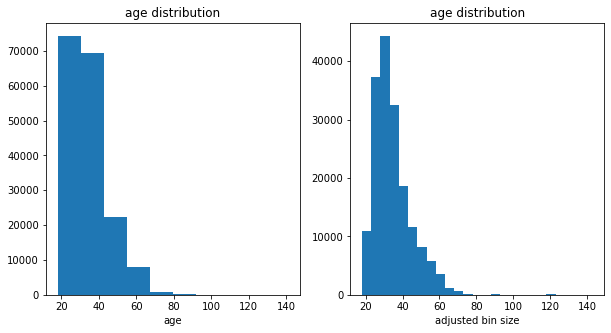

In [563]:
# eploring the distribution of age
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.hist(data= df, x = 'age')
plt.xlabel('age')
plt.title('age distribution')

plt.subplot(1,2,2);
bins = np.arange(18, df['age'].max()+5, 5)
plt.hist(data=df, x='age', bins=bins)
plt.xlabel('adjusted bin size')
plt.title('age distribution');

- there appears to be skewness in the data, with the bar hieght decreasing as age increases and the bin size hiding information due to bin sizes. 
- the second plot shows there is gaps with ages above 80 with quite small heights suggesting outliers
- the most age is 30-35

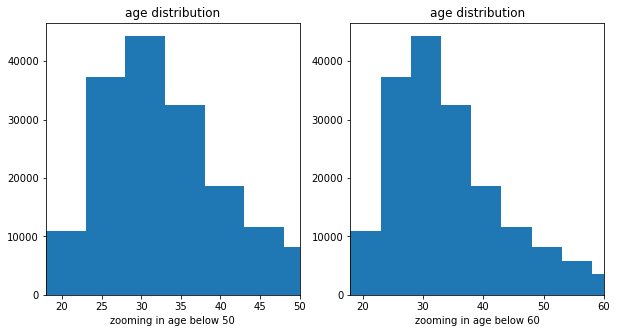

In [565]:
# zooming in into where there is clustered data
plt.figure(figsize=(10,5));
plt.subplot(1,2,1);
bins = np.arange(18, df['age'].max()+5, 5)
plt.hist(data=df, x='age', bins=bins);
plt.xlabel('zooming in age below 50')
plt.title('age distribution')
plt.xlim((18, 50))

# plot on the right
plt.subplot(1,2,2);
bins = np.arange(18, df['age'].max()+5, 5)
plt.hist(data=df, x='age', bins=bins);
plt.xlabel('zooming in age below 60')
plt.title('age distribution')
plt.xlim((18, 60));

- taking a deeper dive into the data shows from plot on the left, there appears to be sysmetry between ages below fifty and for the second plot on the right, we can observe skweness begins to set in from the ages above 50

In [566]:
# this function drops row or column that's passed into the function
def drop(dframe, rw_cl, axis):
    dframe.drop(rw_cl, axis=axis, inplace=True)

In [567]:
#getting the index of outliering values to be dropped in the df1
index = get_outlier_index(df1, 'age')

In [568]:
drop(df1, index,0)

Text(0.5, 1.0, 'filtered age distribution after dropping outliers')

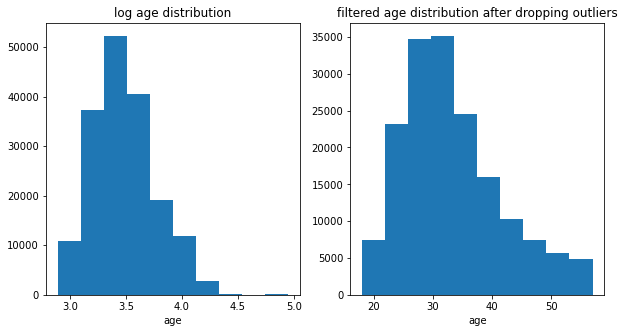

In [610]:
# comparing tranformed age values with removed outlier age values

# constructing histogram for transformed age values 
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.hist(data= df, x = 'log_age')
plt.xlabel('age')
plt.title('log age distribution')

# constructing histogram of age using dataframe with removed outlier values
plt.subplot(1,2,2)
plt.hist(data= df1, x = 'age')
plt.xlabel('age')
plt.title('filtered age distribution after dropping outliers')

the histogram on the left has gap in its upper tail with age above 45 being extreme values. However, it shows sysmetry in ages below 45. on the other hand, the histogram on the left have been filtered off outliering values, no gap can be observed and it is moderately symmetry

In [570]:
#checking the distribution duration
df['duration_sec'].describe()

count    174952.000000
mean         11.733379
std          27.370082
min           1.016667
25%           5.383333
50%           8.500000
75%          13.150000
max        1409.133333
Name: duration_sec, dtype: float64

In [612]:
#exploring distribution of duration and comparing before and after bin sizes are adjusted
#plt.figure(figsize=(25,10));
#plt.subplot(1,2,1);
#plt.hist(data= df, x = 'duration_sec')
#plt.xlabel('duration_sec')
#plt.title('distribution of duration_sec')

#plt.subplot(1,2,2);
#bins = np.arange(61, df['duration_sec'].max()+ 1500, 1500)
#plt.hist(data=df, x='duration_sec', bins=bins);
#plt.xlabel('duration_sec bins')
#plt.xticks([61, 100, 200,300])
#plt.title('distribution of duration_sec ')
#plt.xlim(0,84548);

In [571]:

#getting the summary statistics
df['distance'].describe()

count    174952.000000
mean       1688.988019
std        1096.268003
min           0.000000
25%         909.871587
50%        1428.931627
75%        2222.613575
max       69425.624772
Name: distance, dtype: float64

In [572]:
#plt.figure(figsize=[10,10]);
#plt.subplot(1,2,1);
#plt.hist(data= df, x = 'distance')
#plt.xlabel('distance')
#plt.title('distance')

#plt.subplot(1,2,2);
#bins = np.arange(df['distance'].min(), df['distance'].max()+ 10, 10)
#plt.hist(data=df, x='distance', bins=bins)
#plt.xlabel('adjusted distance bin size')
#plt.title('distance distribution');

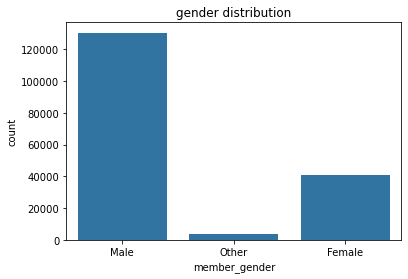

In [573]:
# exploring most common gender
color = sb.color_palette()[0];
sb.countplot(data=df1, x='member_gender', color=color)
plt.title('gender distribution');

- there are more males than females and others being the least.

Text(0.5, 1.0, 'distribution of mambership type')

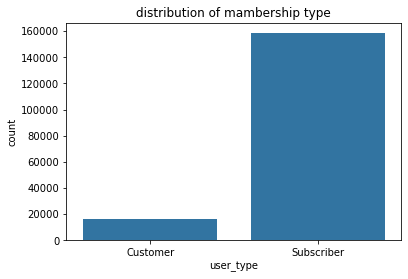

In [574]:
#exploring membership type distribution
color = sb.color_palette()[0]
sb.countplot(data=df1, x='user_type', color=color).set_title('membership type')
plt.title('distribution of mambership type')

- there are more subscriber than customer, this shows more the bike sharing system has more committed customers.

In [575]:
df.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'member_birth_year', 'member_gender', 'bike_share_for_all_trip', 'age',
       'distance', 'log_age'],
      dtype='object')

In [615]:
# checking number of unique values
df1['start_station_name'].nunique()

329

In [616]:
# slicing or selected the first 10 most visited station 
counts = df1['start_station_name'].value_counts()[0:10]
counts

Market St at 10th St                                         3610
San Francisco Caltrain Station 2  (Townsend St at 4th St)    3287
Berry St at 4th St                                           2856
Montgomery St BART Station (Market St at 2nd St)             2642
Powell St BART Station (Market St at 4th St)                 2548
San Francisco Caltrain (Townsend St at 4th St)               2441
San Francisco Ferry Building (Harry Bridges Plaza)           2382
Howard St at Beale St                                        2114
Powell St BART Station (Market St at 5th St)                 2110
Steuart St at Market St                                      2088
Name: start_station_name, dtype: int64

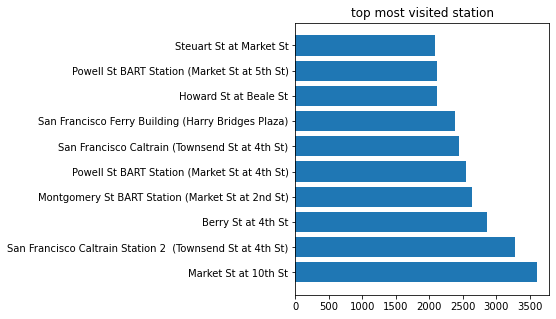

In [617]:
# plotting horinzontal bar chart for the 10 most visited stations
plt.figure(figsize=(10,5));
plt.subplot(1,2,1);
plt.barh(data=counts, y=counts.index, width=counts.values);
plt.title('top most visited station');
#plt.x(rotation=90);

- Market St at 10th Street has the highest count, it is the most used station. 

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The distribution of age is skewed to the right with gap and extreme values in the tail end but moderately symmetry in at ages below 50. user_type which has two levels and 'member_gender' are object data type 

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Age has extreme values with gaps at age above 50 and user_type was change to catergorical dtype. duration_sec was divided by 60 to change to minutes to reduce its large values. Also, age was transformed and named "log_age" using logrithm to make sysmerty and eleminate outlying values. This was compared with dropping outliers using histogram to see which is best to be use. At the end the adopted work done on age was removed outliers. 

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

In [579]:
df.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'member_birth_year', 'member_gender', 'bike_share_for_all_trip', 'age',
       'distance', 'log_age'],
      dtype='object')

In [580]:
df['user_type'].dtype

CategoricalDtype(categories=['Customer', 'Subscriber'], ordered=False)

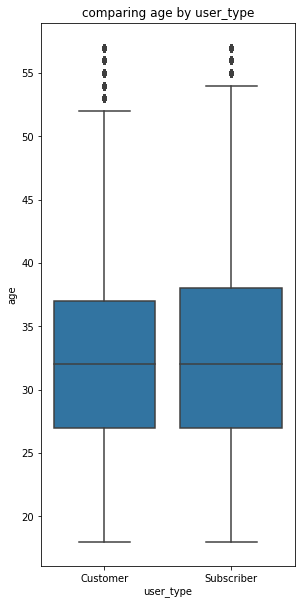

In [614]:
# constructing boxplot of age vs user_type
plt.figure(figsize=(10,10))
color = sb.color_palette()[0]
plt.subplot(1,2,1)
sb.boxplot(data=df1, y='age', x='user_type',color=color)
plt.title('comparing age by user_type');

#plt.subplot(1,2,2)
#y=np.log(df['age'])
#sb.boxplot(data=df, y='log_age', x='user_type',color=color)
#plt.title('comparing log tranformed age by user_type')
#plt.xscale('log');

- THe median age of customers and subscribers appears to be the same however, there are more extreme ages in the customer category than in subscriber user type. There appears to be slightly more spread in age distribution of subscribers than in customers.

In [621]:
# quantifying the degree of relationship between age and distance
df['age'].corr(df['distance'])

0.02021943802272607

correlation coefficient says there is almost no correlation between age and distance. 

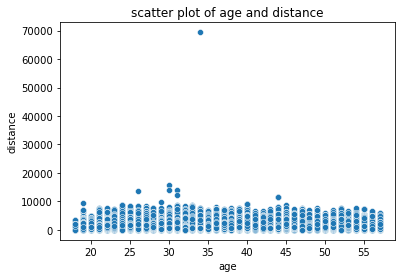

In [620]:
sb.scatterplot(data=df1, x='age', y='distance')
plt.xlabel('age')
plt.ylabel('distance')
plt.title('scatter plot of age and distance');

it can be seen that distance and age are related in a nonlinear fashion, this confirms why correlation coefficient could not capture the relationship, also, there are few extreme data points with few amount of variability or data point being too far from cluster of data.

In [584]:
# Computing correlation between age and duration 
df['age'].corr(df['duration_sec'])

0.006041174875254495

- correlation suggests there is almost no or no correlation between age and time travelled 

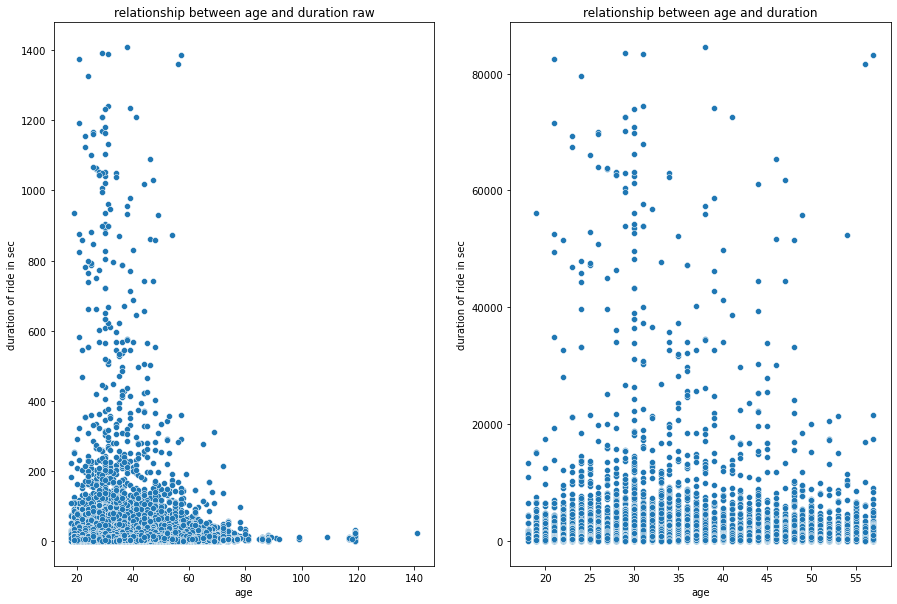

In [631]:
# construncting scatter plots
plt.figure(figsize=[15,10]);
plt.subplot(1,2,1)
sb.scatterplot(data=df, x='age', y='duration_sec')
plt.xlabel('age')
plt.ylabel('duration of ride in sec')
plt.title('relationship between age and duration raw')

plt.subplot(1,2,2)
sb.scatterplot(data=df1, x='age', y='duration_sec');
plt.xlabel('age')
plt.title('relationship between age and duration')
plt.ylabel('duration of ride in sec');

duration and age are nonlinearly related from the first graph, there is great amount of variabilty between age and duration of ride

In [586]:
#'''this function does the log transformation of dataframe in base ten values or returns the 10  
# raised to the power of x(dataframe vlaues) if inverse set to true'''
def transform(x, inverse= False):
    if not inverse:
        return np.log10(x)
    else:
        return np.power(10,x)

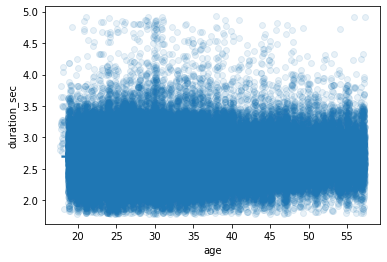

In [627]:
# exploring log-tranform of duration_sec against age, to see if it will perfomr better than above graph. 
sb.regplot(df1['age'], df1['duration_sec'].apply(transform), x_jitter = 0.3, scatter_kws={'alpha':1/10});
#tick_locs = [10, 20, 50, 100]
#plt.xticks(transform(tick_locs), tick_locs);

- there appears to negative relationship between duration_sec and age. as age increase so does duration_Sec increases. There is still a grate amount of variable after transformation.

In [588]:
df.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'member_birth_year', 'member_gender', 'bike_share_for_all_trip', 'age',
       'distance', 'log_age'],
      dtype='object')

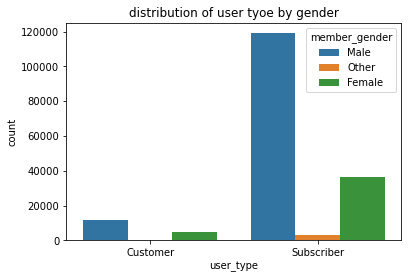

In [589]:
sb.countplot(data=df, x='user_type', hue='member_gender')
plt.title('distribution of user tyoe by gender');

there are more male customers than females, more male subscriber than any gender 

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> It is interesting to see that age varies with distance in a nonlinear matter, lower ages is associated with lower distances, from lower ages to median ages are associated with higher distance travelled and higher ages experinced declined distance travelled. Also, there are higher subscribers than customers which causually use bike sharing, comparing 'member_gender' with user_type, shows there are more male subscriber than male customers, more female subscribers than female customers, more 'other gender' subscriber than 'other customers' and male subscribers being the highest gender of all 'member-genders user types'.
### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> One might expect interaction of age and duration_sec (total number of time the bike is hired or used) to have a linear relationship however, they are related in a nonlinear manner. lower ages at left tail end or smaller ages are associated with less time duration and middle ages with higher duration time which declined at ages above the upper quartile as age continues to increase.

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

In [590]:
#storing the values in user type in d
d = []
for i in df['user_type']:
    if i not in d:
        d.append(i)
print(d)

['Customer', 'Subscriber']


In [591]:
df.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'member_birth_year', 'member_gender', 'bike_share_for_all_trip', 'age',
       'distance', 'log_age'],
      dtype='object')

C:\Users\Adebakin\anaconda3\envs\project_2\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


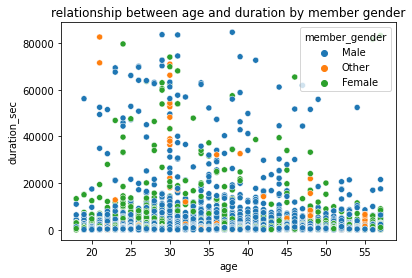

In [608]:
#plotting the scatter plot of age, duration_sec by gender
sb.scatterplot(data=df1, x='age', y='duration_sec', hue='member_gender')
plt.title('relationship between age and duration by member gender');

the 'other' has the most variable of all the three genders, there are more variation in females than in males with both gender showing variability in distribution, the plots shows a non-linear relationship

C:\Users\Adebakin\anaconda3\envs\project_2\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


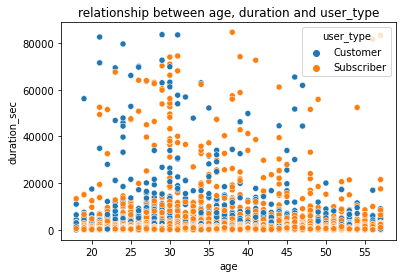

In [600]:
sb.scatterplot(data=df1, x='age', y='duration_sec', hue='user_type')
plt.title('relationship between age, duration and user_type');

there is great amount of variable in both customers user_type and subscriber user_type, the data clustered around 20 to 60 and flattens suggesting non-linear relationship

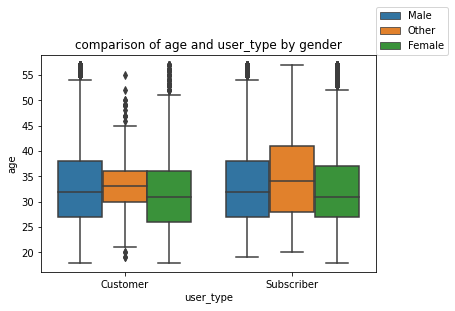

In [635]:
sb.boxplot(data=df1, y='age', x='user_type', hue='member_gender')
plt.legend(loc=(1,1))
plt.title('comparison of age and user_type by gender');

the graph shows there are no uniform average among genders. the age in the male customer category is spread out above the median age so in male subscriber category. for the other gender type, customer type's age have its average age above males and female with moderate spread but has outlying values. however, the age is more spread out in subcriber. Female, the is skewness in age for female that subcribed for ages above the median age and moderate spread in the customer category.

In [595]:
#plt.figure(figsize=(10,10))
#sb.boxplot(data=df, y='duration_sec', x='member_gender', hue='user_type')
#plt.title('compaing ride time(duration_sec) with gender by user_type');

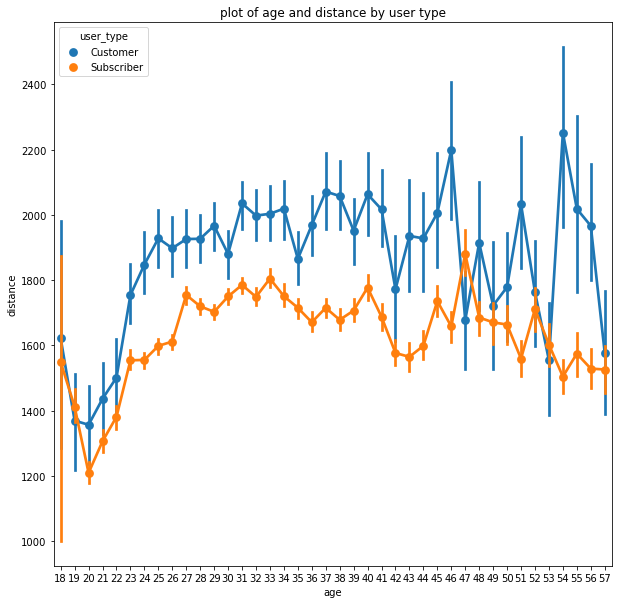

In [629]:
plt.figure(figsize=(10,10))
sb.pointplot(data=df1, x='age', y='distance', hue='user_type')
plt.title('plot of age and distance by user type');

the graph shows a non linear pattern with gaps and spikes. it can be observed that customer member type are going for longer distances that subscriber member type

the graph shows a non linear pattern with lot of spikes especially in the other gender category and gaps towards the end of the graph. for male and female there is consistence increase as age moves from 20 to about 40 with minimal spikes 

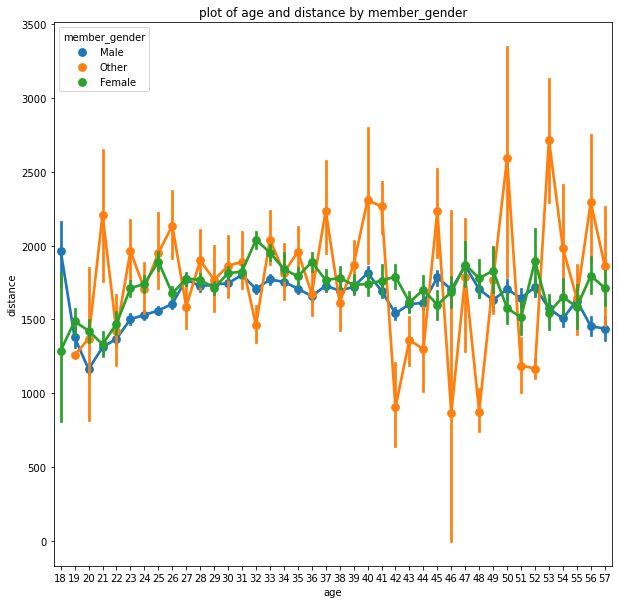

In [630]:
plt.figure(figsize=(10,10))
sb.pointplot(data=df1, x='age', y='distance', hue='member_gender')
plt.title('plot of age and distance by member_gender');

In [640]:
#saving the cleaned dataset as worked_on
df1.to_csv('worked_on', index=False)

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

>Customer user type' tends to have higher distance travel as age increases in a nonlinear manner also. The 'user type' has high impact above subscriber user_type as most long distance traveled is observed with customer user_type. 

### Were there any interesting or surprising interactions between features?

> 'The interesting thing is that subcriber user_typer (the committed to the bike sharing system) are expected to have longer distance and higher time duration. However, 'customer user_type' have longer distance and higher duration time as age increases which is done in a nonlinear manner. For both distance and duraction_sec vs age by user type or member gender, lower tailed ages tends to have small distance and duration, from lower to middle ages higher distance and longer duration time and upper tail ages experienced less distance travel and duration time 


## Conclusions

>  The univariate analysis shows there are more males using the system than females, Market St at 10th St is the most used station and there are more subscribers than casual users(customers). The analysis was extended to bivariate to check how age, distance and duration interacts, which reveals age is related to distance and time of ride(duration_sec) in a nonlinear fashion. This implies that lower age below 20 is associated with shorter distances, ages above 20 to around 45 have higher distance and duration travel while ages aboves 45 suffers decline. Multivariate analysis shows 'customer' member type have higher duration and distance travel comapred to subscribers as age increases.




> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML or PDF` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!

